In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
uploaded= files.upload()

Saving House_prediction.csv to House_prediction.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['House_prediction.csv']))
df1 = pd.read_csv(io.BytesIO(uploaded['House_prediction.csv']))

# Part 1: City-wise plotting of mean of features 

In [ ]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [ ]:
df.groupby('city').mean()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,,,,,
Belo Horizonte,207.411765,3.020668,2.402226,1.955485,2324.197138,3664.127981,272.782194,53.675676,6315.242448
Campinas,137.561547,2.355217,1.960141,1.558030,628.922626,2364.290739,147.657679,32.388042,3173.276671
Porto Alegre,103.609388,2.140821,1.725901,1.044426,491.618609,2337.699916,124.021794,36.425817,2989.782900
Rio de Janeiro,105.347768,2.243837,1.756163,0.744171,1079.432378,3232.904064,256.853431,42.483011,4611.684877
São Paulo,158.899439,2.558859,2.467641,1.877527,1169.627994,4652.793783,495.701716,62.428911,6380.831833


In [ ]:
data = df.groupby('city').mean().to_numpy()
area=data[:,0]
rooms=data[:,1]
bathroom=data[:,2]
parking_space=data[:,3]
hoa=data[:,4]
rent=data[:,5]
property_tax=data[:,6]
fire_insurance=data[:,7]
total=data[:,8]
city=np.array(['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','Sao Paulo'])

<Figure size 432x288 with 0 Axes>

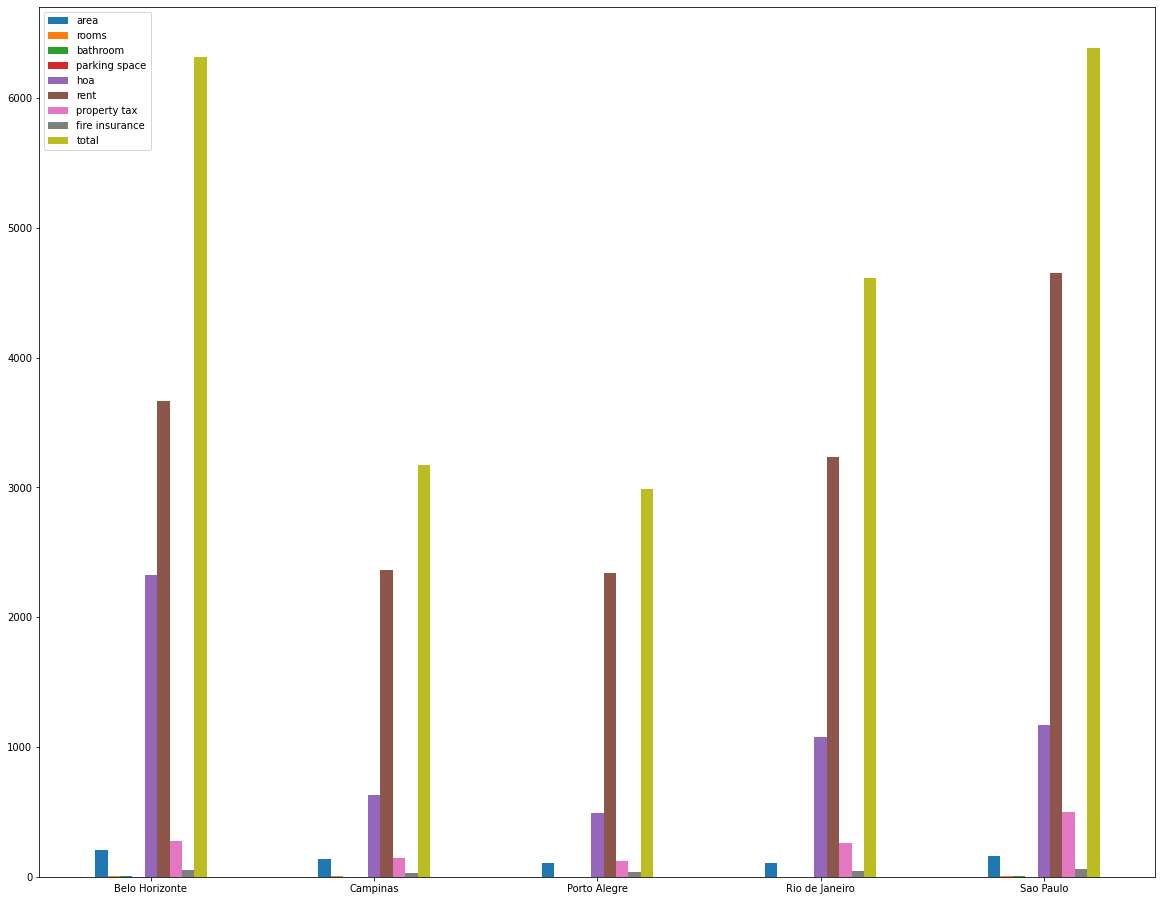

In [ ]:
df_ = pd.DataFrame({'area': area, 'rooms': rooms, 'bathroom': bathroom, 'parking space': parking_space, 'hoa': hoa, 'rent': rent,
                   'property tax': property_tax, 'fire insurance': fire_insurance, 'total': total}, index=city)
plt.tight_layout()
ax = df_.plot.bar(rot=0,figsize=(20,16))

Since, "rooms", "bathrooms" and "parking space" aren't visible in above plot making a different plot for them:

<Figure size 432x288 with 0 Axes>

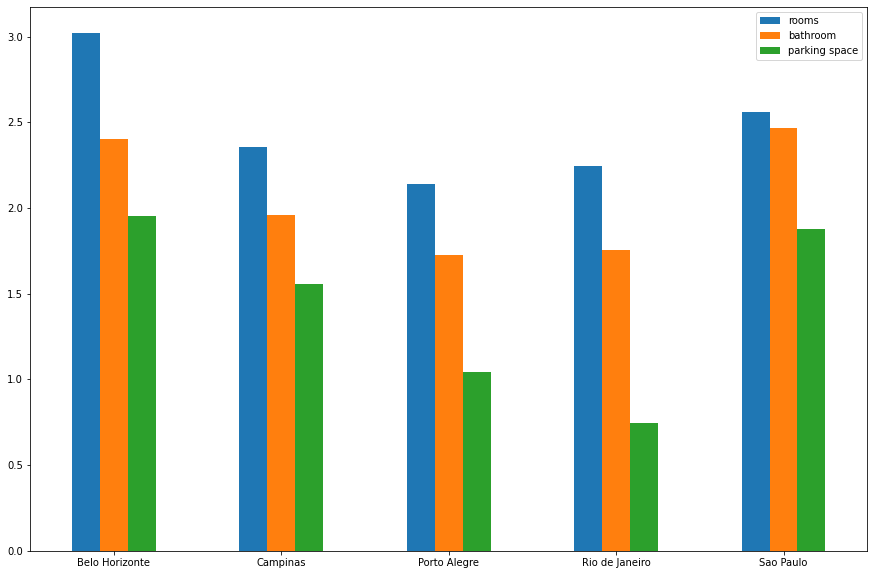

In [ ]:
df_ = pd.DataFrame({'rooms': rooms, 'bathroom': bathroom, 'parking space': parking_space}, index=city)
plt.tight_layout()
ax = df_.plot.bar(rot=0,figsize=(15,10))

# Part 2: Dependence of House Association Tax, property tax, and fire insurance on other features.

### Preprocessing:
<ol>
  <li>Made furnished as 1 and else 0</li>
  <li>Made acept in animals column as 1 and else 0</li>
  <li>changed the dtype of floor column to int</li>
</ol>


In [ ]:
df1['furniture']=df1.furniture.eq('furnished').mul(1)
df1['animal']=df1.animal.eq('acept').mul(1)
df1.columns = df1.columns. str. replace(' ','_')
df1['floor']=df1['floor'].replace('-',0).astype(int)
df1.head(5)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa_(R$),rent_amount_(R$),property_tax_(R$),fire_insurance_(R$),total_(R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


### Intuition: 
Getting idea for the range of some columns

In [ ]:
df1.area.max()

46335

In [ ]:
df1.area.min()

11

In [ ]:
df1.rooms.max()

13

In [ ]:
df1.rooms.min()

1

In [ ]:
df1.bathroom.max()

10

In [ ]:
df1.bathroom.min()

1

In [ ]:
df1.parking_spaces.max()

12

In [ ]:
df1.parking_spaces.min()

0

In [ ]:
df1.floor.max()

301

In [ ]:
df1.floor.min()

0

## Floors
Calculating how number of floors affect the taxes

In [ ]:
#three columns for storing three taxes
bel_two=np.array([0,0,0])
two_five=np.array([0,0,0])
five_thirty=np.array([0,0,0])
thirty_seventy=np.array([0,0,0])
seventy_abv=np.array([0,0,0])

floor_2=df1[df1["floor"]<=2]
bel_two[0]= sum(floor_2["hoa_(R$)"])/floor_2.size
bel_two[1]= sum(floor_2["property_tax_(R$)"])/floor_2.size
bel_two[2]= sum(floor_2["fire_insurance_(R$)"])/floor_2.size

floor_5= df1.loc[(df1["floor"]>2) & (df1["floor"]<=5)]
two_five[0]= sum(floor_5["hoa_(R$)"])/floor_5.size
two_five[1]= sum(floor_5["property_tax_(R$)"])/floor_5.size
two_five[2]= sum(floor_5["fire_insurance_(R$)"])/floor_5.size

floor_30= df1.loc[(df1["floor"]>5) & (df1["floor"]<=30)]
five_thirty[0]= sum(floor_30["hoa_(R$)"])/floor_30.size
five_thirty[1]= sum(floor_30["property_tax_(R$)"])/floor_30.size
five_thirty[2]= sum(floor_30["fire_insurance_(R$)"])/floor_30.size

floor_70= df1.loc[(df1["floor"]>30) & (df1["floor"]<=70)]
thirty_seventy[0]= sum(floor_70["hoa_(R$)"])/floor_70.size
thirty_seventy[1]= sum(floor_70["property_tax_(R$)"])/floor_70.size
thirty_seventy[2]= sum(floor_70["fire_insurance_(R$)"])/floor_70.size

floor_300=df1.loc[(df1["floor"]>70)]
seventy_abv[0]= sum(floor_300["hoa_(R$)"])/floor_300.size
seventy_abv[1]= sum(floor_300["property_tax_(R$)"])/floor_300.size
seventy_abv[2]= sum(floor_300["fire_insurance_(R$)"])/floor_300.size


<Figure size 432x288 with 0 Axes>

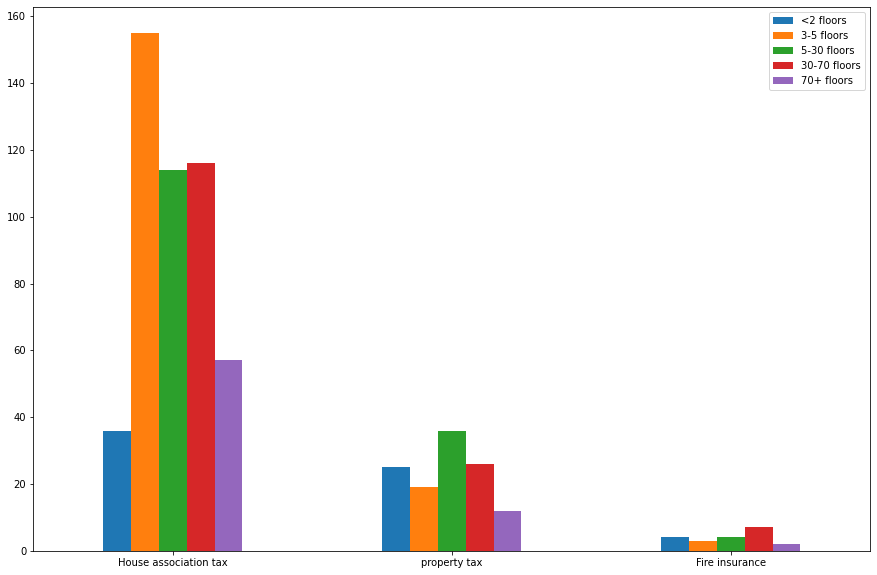

In [ ]:
tax=np.array(["House association tax","property tax","Fire insurance"])
dfo = pd.DataFrame({'<2 floors': bel_two, '3-5 floors': two_five, '5-30 floors': five_thirty, '30-70 floors': thirty_seventy, '70+ floors': seventy_abv}, index=tax)
plt.tight_layout()
ax = dfo.plot.bar(rot=0,figsize=(15,10))

### Observations:
<ul>
  <li>Every tax follows almost same pattern: 
    <ul>
      <li>It increases with increase of floor</li>
      <li>After reaching maxima at about 5-30 floors it starts decreasing</li>
    </ul>
  </li>
  <li>I think only appartments or company buildings have 20+ floors, so for them the taxes are less</li>
</ul>

## Animal and furniture
Calculating how inclusion of animals and furnishing affects the taxes

In [ ]:
allowed_and_furnished=np.array([0,0,0])
not_allowed_and_furnished= np.array([0,0,0])
allowed_and_not_furnished= np.array([0,0,0])
not_all_and_not_fur=np.array([0,0,0])

one_1= df1.loc[(df1["furniture"]==1) & (df1["animal"]==1)]
allowed_and_furnished[0]= sum(one_1["hoa_(R$)"])/one_1.size
allowed_and_furnished[1]= sum(one_1["property_tax_(R$)"])/one_1.size
allowed_and_furnished[2]= sum(one_1["fire_insurance_(R$)"])/one_1.size

zero_1= df1.loc[(df1["furniture"]==0) & (df1["animal"]==1)]
allowed_and_not_furnished[0]= sum(zero_1["hoa_(R$)"])/zero_1.size
allowed_and_not_furnished[1]= sum(zero_1["property_tax_(R$)"])/zero_1.size
allowed_and_not_furnished[2]= sum(zero_1["fire_insurance_(R$)"])/zero_1.size

one_0= df1.loc[(df1["furniture"]==1) & (df1["animal"]==0)]
not_allowed_and_furnished[0]= sum(one_0["hoa_(R$)"])/one_0.size
not_allowed_and_furnished[1]= sum(one_0["property_tax_(R$)"])/one_0.size
not_allowed_and_furnished[2]= sum(one_0["fire_insurance_(R$)"])/one_0.size

zero_0= df1.loc[(df1["furniture"]==0) & (df1["animal"]==0)]
not_all_and_not_fur[0]= sum(zero_0["hoa_(R$)"])/zero_0.size
not_all_and_not_fur[1]= sum(zero_0["property_tax_(R$)"])/zero_0.size
not_all_and_not_fur[2]= sum(zero_0["fire_insurance_(R$)"])/zero_0.size


<Figure size 432x288 with 0 Axes>

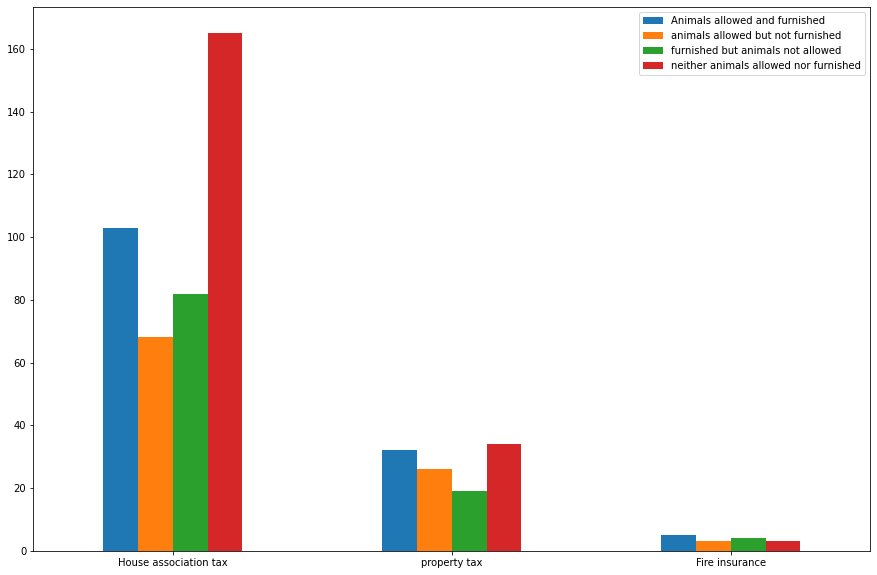

In [ ]:
dfp = pd.DataFrame({'Animals allowed and furnished': allowed_and_furnished, 'animals allowed but not furnished': allowed_and_not_furnished, 
                    'furnished but animals not allowed': not_allowed_and_furnished, 'neither animals allowed nor furnished': not_all_and_not_fur}, index=tax)
plt.tight_layout()
ax = dfp.plot.bar(rot=0,figsize=(15,10))

### Observations:
<ul>
  <li>For some reason when neither animals aren't allowed nor furnitures are furnished, the HAT and PT are very high</li>
</ul>

## City
How location of houses affects the taxes

In [ ]:
city=np.array(['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','Sao Paulo'])
Belo=np.array([0,0,0])
Campinas=np.array([0,0,0])
Porto=np.array([0,0,0])
Rio=np.array([0,0,0])
Sao=np.array([0,0,0])

Bel= df1.loc[(df1["city"]=="Belo Horizonte")]
Belo[0]= sum(Bel["hoa_(R$)"])/Bel.size
Belo[1]= sum(Bel["property_tax_(R$)"])/Bel.size
Belo[2]= sum(Bel["fire_insurance_(R$)"])/Bel.size

Campina=df1.loc[(df1["city"]=="Campinas")]
Campinas[0]= sum(Campina["hoa_(R$)"])/Campina.size
Campinas[1]= sum(Campina["property_tax_(R$)"])/Campina.size
Campinas[2]= sum(Campina["fire_insurance_(R$)"])/Campina.size

Sa=df1.loc[(df1["city"]=="São Paulo")]
Sao[0]= sum(Sa["hoa_(R$)"])/Sa.size
Sao[1]= sum(Sa["property_tax_(R$)"])/Sa.size
Sao[2]= sum(Sa["fire_insurance_(R$)"])/Sa.size

Port=df1.loc[(df1["city"]=="Porto Alegre")]
Porto[0]= sum(Port["hoa_(R$)"])/Port.size
Porto[1]= sum(Port["property_tax_(R$)"])/Port.size
Porto[2]= sum(Port["fire_insurance_(R$)"])/Port.size

Ri=df1.loc[(df1["city"]=="Rio de Janeiro")]
Rio[0]= sum(Ri["hoa_(R$)"])/Ri.size
Rio[1]= sum(Ri["property_tax_(R$)"])/Ri.size
Rio[2]= sum(Ri["fire_insurance_(R$)"])/Ri.size


<Figure size 432x288 with 0 Axes>

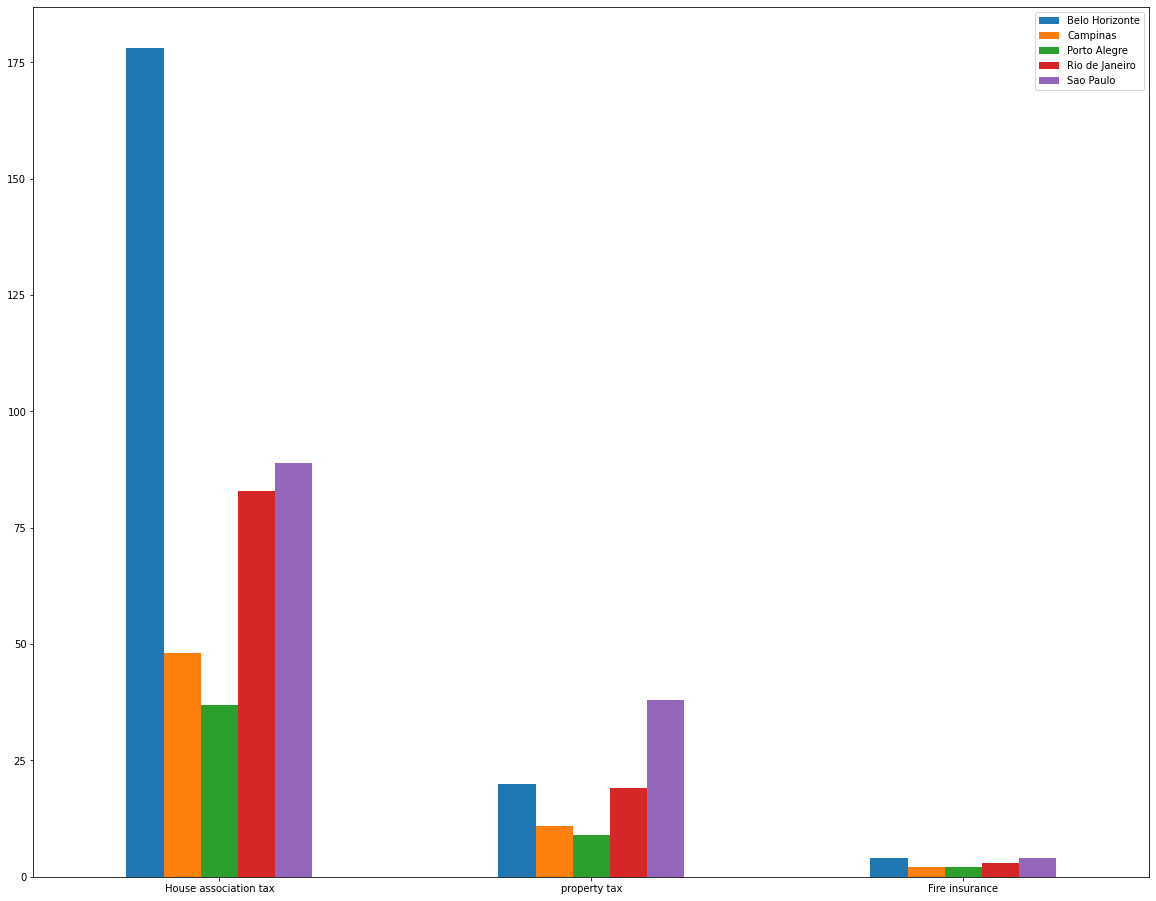

In [ ]:
df2 = pd.DataFrame({'Belo Horizonte': Belo, 
                    'Campinas': Campinas, 
                    'Porto Alegre': Porto, 
                    'Rio de Janeiro': Rio, 
                    'Sao Paulo': Sao}, index=tax)
plt.tight_layout()
ax = df2.plot.bar(rot=0,figsize=(20,16))

### Observations:
<ul>
  <li>From above graph Bela Horizonte and Sao Paulo demands highest taxes, followed by Rio de Janeiro</li>
</ul>
